Verify with python

In [1]:
pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 163.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 35.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 135.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 MB 226.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [streamlit]12 [streamlit]
Note: you may need to restart the kernel to use updated packages.


Missing values in ratings:
 userId     0
movieId    0
rating     0
dtype: int64
Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64
Cleaned ratings shape: (100836, 3)
Movies shape after removing '(no genres listed)': (9708, 3)
Movies dataset preview:
  movieId                               title  \
0       1                    Toy Story (1995)   
1       2                      Jumanji (1995)   
2       3             Grumpier Old Men (1995)   
3       4            Waiting to Exhale (1995)   
4       5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings dataset preview:
  userId movieId  rating
0      1       1     4.0
1      1    1009     3.0
2      1     101     5.0
3      

/tmp/ipykernel_1202/122091520.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=movie_data_df, palette=palette,


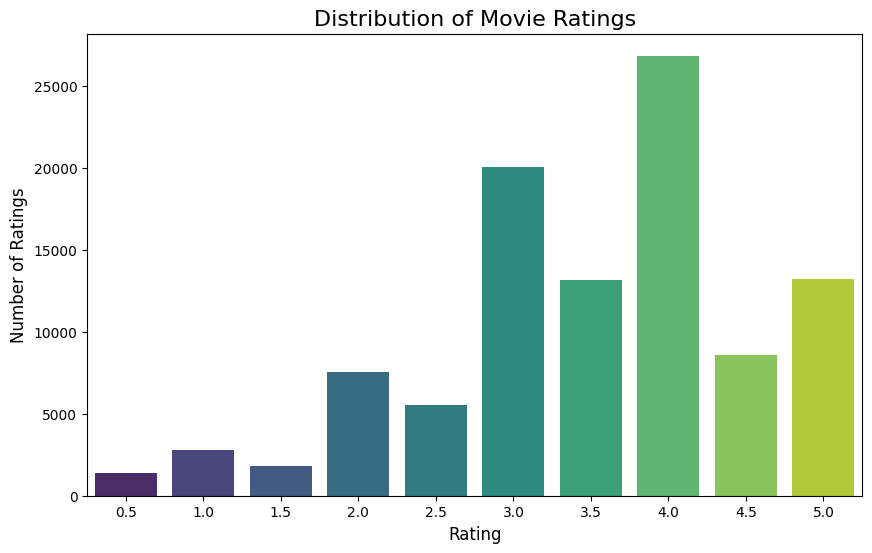

/tmp/ipykernel_1202/122091520.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')


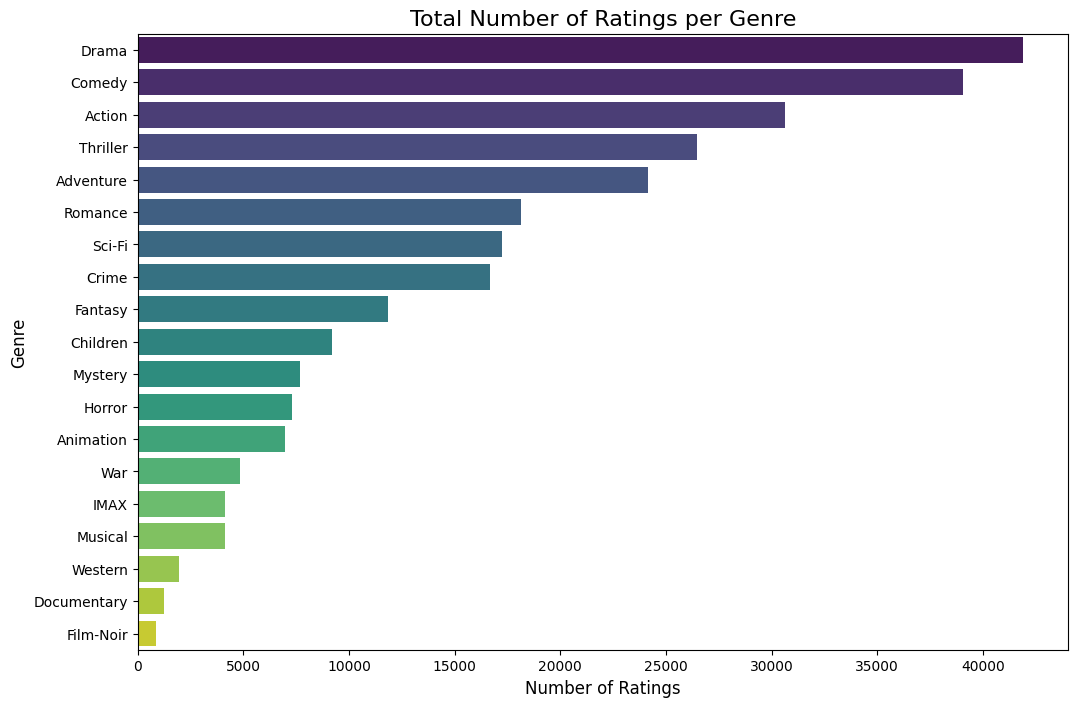

/tmp/ipykernel_1202/122091520.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='magma')


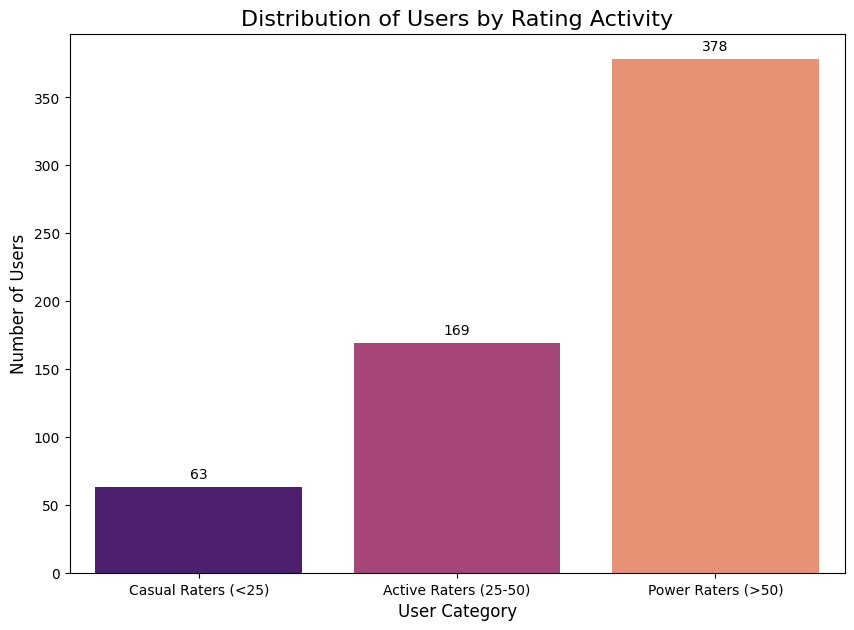

/tmp/ipykernel_1202/122091520.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_genre_rating.values, y=average_genre_rating.index, palette='plasma')


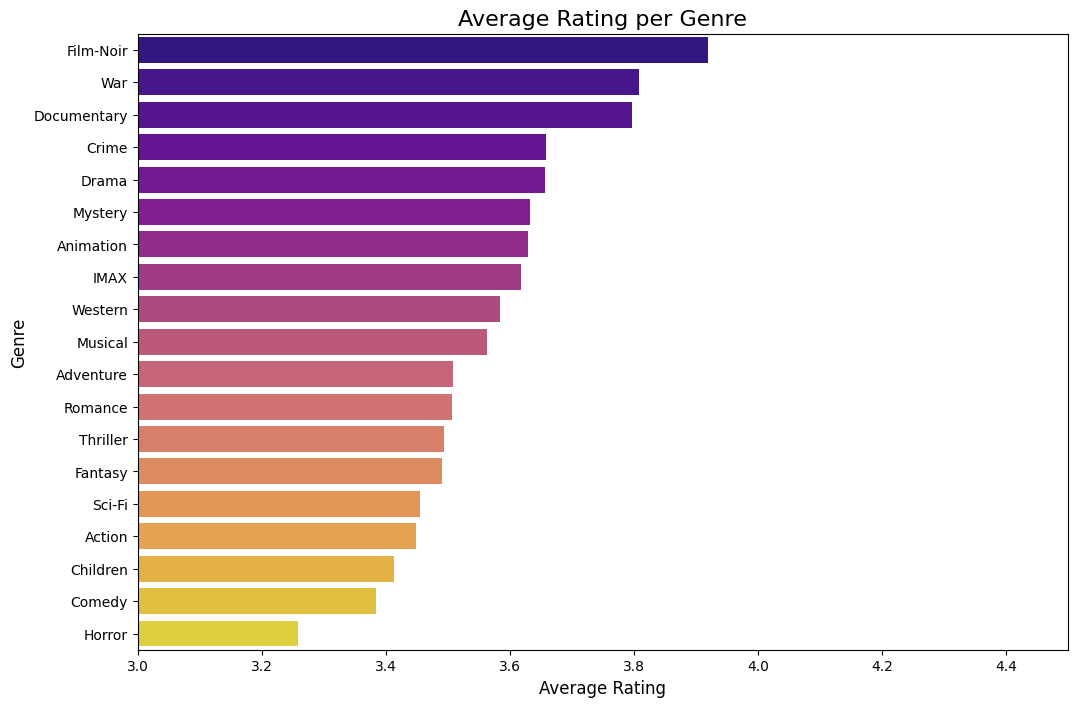

/tmp/ipykernel_1202/122091520.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_ratings_by_genre_count.index, y=total_ratings_by_genre_count.values, palette='plasma')


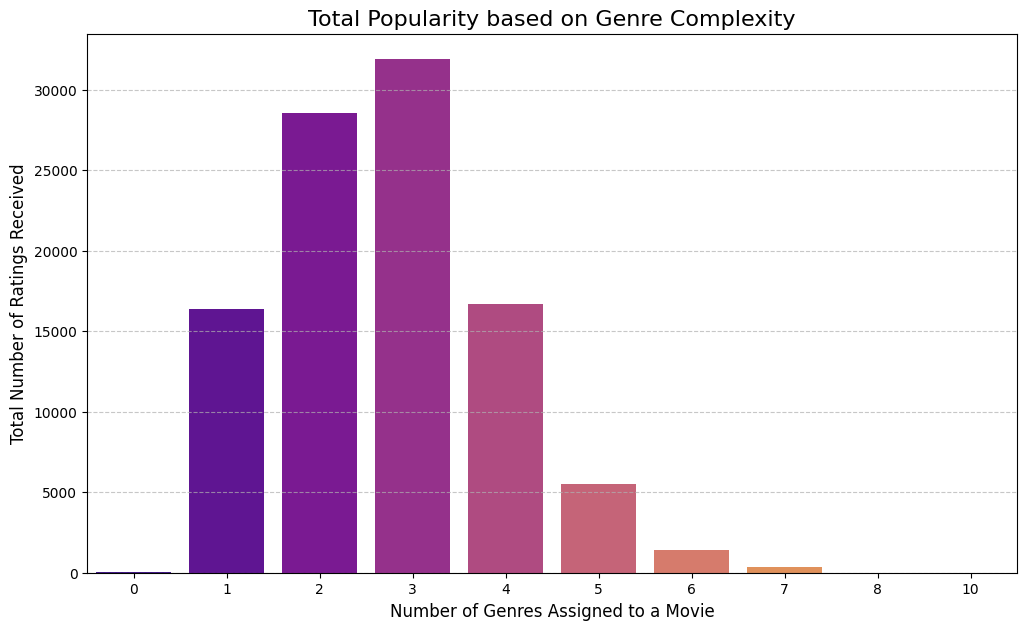

Train size: 70585
Validation size: 15125
Test size: 15126
Trainset ready for Surprise (type): <class 'surprise.trainset.Trainset'>
Validation set example (first 5): [('562', '150', 3.0), ('202', '2997', 5.0), ('441', '1241', 5.0), ('288', '8784', 2.5), ('357', '592', 3.0)]
Test set example (first 5): [('527', '4571', 5.0), ('258', '527', 4.0), ('221', '520', 2.5), ('140', '1047', 3.0), ('560', '500', 3.5)]
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Training completed for user-KNN, item-KNN and SVD.
Validation RMSEs:
RMSE: 0.9888
User-KNN RMSE (valid): 0.9887722175539313
RMSE: 0.9853
Item-KNN RMSE (valid): 0.9853122591662667
RMSE: 0.8817
SVD RMSE (valid): 0.8816888098413114
Test set results:
RMSE: 0.9695
User-KNN RMSE: 0.9694813492743101
MAE:  0.7468
User-KNN MAE:  0.7467521895267187
RMSE: 0.9625
Item-KNN RMSE: 0.9624529972653459
MAE:  0.7506
Item-KNN MAE:  0.7505704760619576
RMS

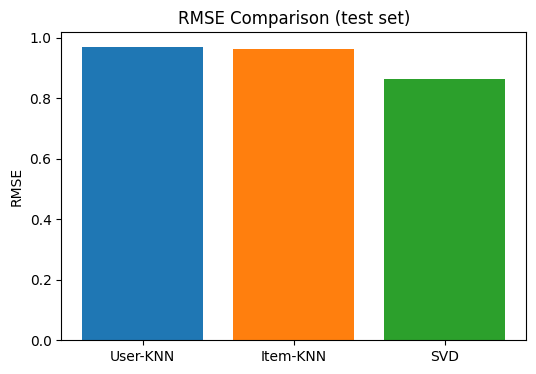

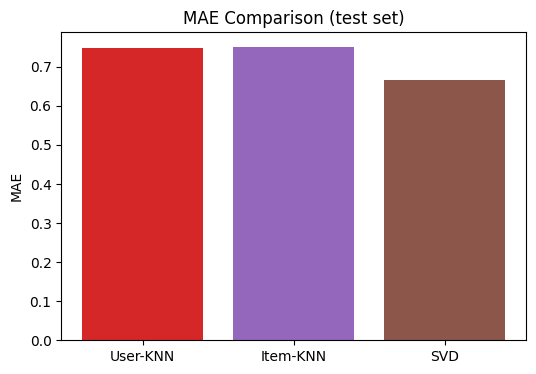

User-KNN AUC: 0.6956436952411847 Acc: 0.6045220150733835
Item-KNN AUC: 0.6877830994165316 Acc: 0.6016131164881661
SVD AUC: 0.7802197772377004 Acc: 0.6433293666534444


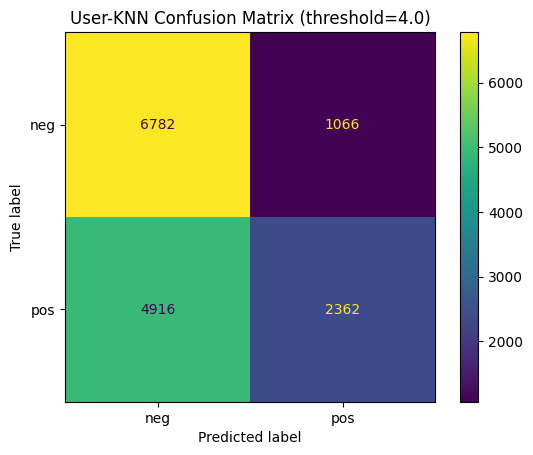

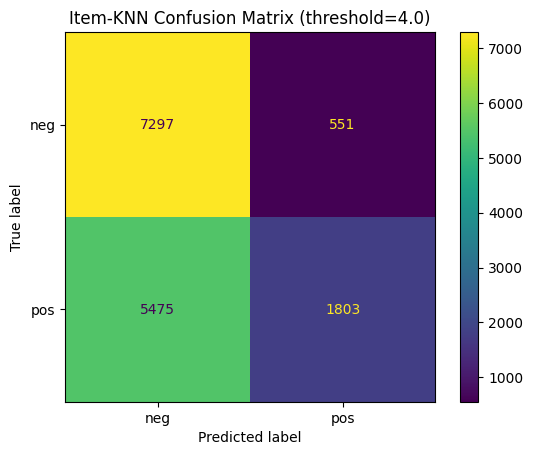

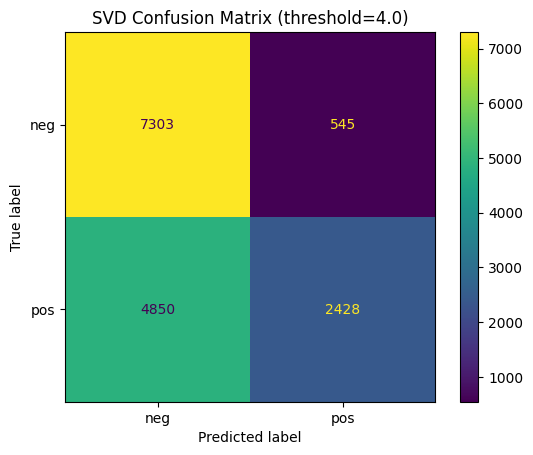

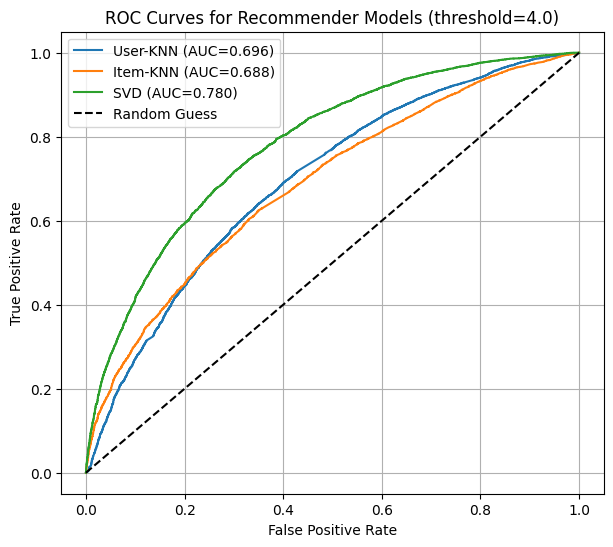

Sample user: 1
  movieId  pred_rating                                              title  \
0      53          5.0                                    Lamerica (1994)   
1      99          5.0               Heidi Fleiss: Hollywood Madam (1995)   
2     148          5.0                   Awfully Big Adventure, An (1995)   
3     430          5.0                               Calendar Girl (1993)   
4     467          5.0                             Live Nude Girls (1995)   
5     495          5.0  In the Realm of the Senses (Ai no corrida) (1976)   
6     506          5.0                                     Orlando (1992)   
7     626          5.0          Thin Line Between Love and Hate, A (1996)   
8     670          5.0             World of Apu, The (Apur Sansar) (1959)   
9     998          5.0                                  Set It Off (1996)   

                  genres  
0        Adventure|Drama  
1            Documentary  
2                  Drama  
3           Comedy|Drama  
4 

In [4]:
# -------------------------
# 0. Full fixed script — Preprocessing, train/valid/test (70/15/15), train 3 models, evaluate, save
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, ConfusionMatrixDisplay
import joblib
import os
import seaborn as sns

# Surprise (for building CF models)
from surprise import Dataset, Reader, KNNBasic, SVD, accuracy

# reproducibility
RANDOM_STATE = 42

# -------------------------
# 1. Load Data
# -------------------------
movies = pd.read_csv("movies.csv")        # movieId, title, genres
ratings = pd.read_csv("ratings.csv")      # userId, movieId, rating, timestamp (if present)

# -------------------------
# 2. Preprocessing
# -------------------------
# Drop timestamp (not useful here)
if "timestamp" in ratings.columns:
    ratings = ratings.drop(columns=["timestamp"])

# Check missing values
print("Missing values in ratings:\n", ratings.isnull().sum())
print("Missing values in movies:\n", movies.isnull().sum())

# Convert IDs to string for consistency (important for Surprise)
ratings["userId"] = ratings["userId"].astype(str)
ratings["movieId"] = ratings["movieId"].astype(str)
movies["movieId"] = movies["movieId"].astype(str)

# Remove duplicates (same user, same movie) -> keep mean rating
ratings = ratings.groupby(["userId", "movieId"], as_index=False).agg({"rating": "mean"})

print("Cleaned ratings shape:", ratings.shape)

# Optional filtering (uncomment if you want to remove very sparse users/movies)
# min_user_ratings = 5
# min_movie_ratings = 5
# user_counts = ratings['userId'].value_counts()
# movie_counts = ratings['movieId'].value_counts()
# ratings = ratings[ratings['userId'].isin(user_counts[user_counts >= min_user_ratings].index)]
# ratings = ratings[ratings['movieId'].isin(movie_counts[movie_counts >= min_movie_ratings].index)]
# print("After filtering sparsity:", ratings.shape)
# -------------------------
# Extra preprocessing: filter out '(no genres listed)'
# -------------------------
movies = movies[movies["genres"] != "(no genres listed)"].reset_index(drop=True)
print("Movies shape after removing '(no genres listed)':", movies.shape)

# Print first 5 rows of movies and ratings
print("Movies dataset preview:")
print(movies.head())

print("\nRatings dataset preview:")
print(ratings.head())

# -------------------------
# 3.Data Analysis
# -------------------------

# -------------------------
# 3. Data Analysis (fixed: consistent variable usage)
# -------------------------

# Merge ratings with movies so we can analyze genres as well
movie_data_df = ratings.merge(movies, on="movieId", how="left")

plt.figure(figsize=(10, 6))
palette = "viridis"

# Distribution of ratings
ax = sns.countplot(x='rating', data=movie_data_df, palette=palette,
                   order=sorted(movie_data_df['rating'].unique()))
ax.set_title('Distribution of Movie Ratings', fontsize=16)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Number of Ratings', fontsize=12)
plt.show()

# --- Total number of ratings per genre ---
# Expand genres (since movies can have multiple separated by "|")
genre_expanded = movie_data_df.assign(genres=movie_data_df['genres'].str.split('|')).explode('genres')

genre_popularity = genre_expanded['genres'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
plt.title('Total Number of Ratings per Genre', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

# --- User activity distribution ---
user_rating_counts = movie_data_df.groupby('userId')['rating'].count()

def classify_user_activity(count):
    if count < 25:
        return 'Casual Raters (<25)'
    elif count > 50:
        return 'Power Raters (>50)'
    else:
        return 'Active Raters (25-50)'

user_categories = user_rating_counts.apply(classify_user_activity)
category_distribution = user_categories.value_counts().reindex([
    'Casual Raters (<25)',
    'Active Raters (25-50)',
    'Power Raters (>50)'
])

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='magma')
plt.title('Distribution of Users by Rating Activity', fontsize=16)
plt.xlabel('User Category', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# --- Average rating per genre ---
average_genre_rating = genre_expanded.groupby('genres')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_genre_rating.values, y=average_genre_rating.index, palette='plasma')
plt.title('Average Rating per Genre', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xlim(3.0, 4.5)
plt.show()

# --- Genre complexity analysis ---
def count_genres(genre_string):
    return len(genre_string.split('|')) if pd.notnull(genre_string) else 0

movie_data_df['genre_count'] = movie_data_df['genres'].apply(count_genres)
total_ratings_by_genre_count = movie_data_df.groupby('genre_count')['rating'].count().sort_index()

plt.figure(figsize=(12, 7))
sns.barplot(x=total_ratings_by_genre_count.index, y=total_ratings_by_genre_count.values, palette='plasma')
plt.title('Total Popularity based on Genre Complexity', fontsize=16)
plt.xlabel('Number of Genres Assigned to a Movie', fontsize=12)
plt.ylabel('Total Number of Ratings Received', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -------------------------
# 4. Train/Validation/Test Split (70/15/15)
# -------------------------
# First split: train (70%) vs temp (30%)
train_df, temp_df = train_test_split(ratings, test_size=0.30, random_state=RANDOM_STATE, shuffle=True)

# Second split: temp -> validation (15%) and test (15%) -> split temp 50/50
valid_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=RANDOM_STATE, shuffle=True)

print("Train size:", len(train_df))
print("Validation size:", len(valid_df))
print("Test size:", len(test_df))

# -------------------------
# 5. Convert to Surprise Dataset objects / lists
# -------------------------
reader = Reader(rating_scale=(ratings['rating'].min(), ratings['rating'].max()))

# Trainset must be a Surprise Trainset
train_data = Dataset.load_from_df(train_df[["userId", "movieId", "rating"]], reader)
trainset = train_data.build_full_trainset()

# Validation and Test sets: lists of tuples (uid, iid, rating)
validset = list(zip(valid_df["userId"], valid_df["movieId"], valid_df["rating"]))
testset  = list(zip(test_df["userId"], test_df["movieId"], test_df["rating"]))

print("Trainset ready for Surprise (type):", type(trainset))
print("Validation set example (first 5):", validset[:5])
print("Test set example (first 5):", testset[:5])


# -------------------------
# 6. Define & train models
# Primary model: User-based KNN (user-based CF)
# Comparison 1: SVD (matrix factorization)
# Comparison 2: Item-based KNN
# -------------------------
sim_user = {'name': 'cosine', 'user_based': True}
sim_item = {'name': 'cosine', 'user_based': False}

# 6.1 User-based KNN
algo_user = KNNBasic(k=40, min_k=1, sim_options=sim_user)
algo_user.fit(trainset)

# 6.2 Item-based KNN
algo_item = KNNBasic(k=40, min_k=1, sim_options=sim_item)
algo_item.fit(trainset)

# 6.3 SVD
algo_svd = SVD(n_factors=50, n_epochs=20, random_state=RANDOM_STATE)
algo_svd.fit(trainset)

print("Training completed for user-KNN, item-KNN and SVD.")

# -------------------------
# 7. Evaluation on validation set (use this to tune) and final on test set
# -------------------------
# Evaluate on validation set
preds_valid_user = algo_user.test(validset)
preds_valid_item = algo_item.test(validset)
preds_valid_svd  = algo_svd.test(validset)

print("Validation RMSEs:")
print("User-KNN RMSE (valid):", accuracy.rmse(preds_valid_user, verbose=True))
print("Item-KNN RMSE (valid):", accuracy.rmse(preds_valid_item, verbose=True))
print("SVD RMSE (valid):", accuracy.rmse(preds_valid_svd, verbose=True))

# Evaluate on test set (final)
pred_user = algo_user.test(testset)
pred_item = algo_item.test(testset)
pred_svd  = algo_svd.test(testset)

print("Test set results:")
print("User-KNN RMSE:", accuracy.rmse(pred_user, verbose=True))
print("User-KNN MAE: ", accuracy.mae(pred_user, verbose=True))

print("Item-KNN RMSE:", accuracy.rmse(pred_item, verbose=True))
print("Item-KNN MAE: ", accuracy.mae(pred_item, verbose=True))

print("SVD RMSE:", accuracy.rmse(pred_svd, verbose=True))
print("SVD MAE: ", accuracy.mae(pred_svd, verbose=True))

# -------------------------
# 8. Comparative results & bar plot
# -------------------------
rmse_user = accuracy.rmse(pred_user, verbose=False)
mae_user  = accuracy.mae(pred_user, verbose=False)

rmse_item = accuracy.rmse(pred_item, verbose=False)
mae_item  = accuracy.mae(pred_item, verbose=False)

rmse_svd  = accuracy.rmse(pred_svd, verbose=False)
mae_svd   = accuracy.mae(pred_svd, verbose=False)

results = pd.DataFrame({
    'model': ['User-KNN', 'Item-KNN', 'SVD'],
    'RMSE': [rmse_user, rmse_item, rmse_svd],
    'MAE': [mae_user, mae_item, mae_svd]
})
print("\nSummary results:\n", results)

# RMSE bar chart with different colors
plt.figure(figsize=(6,4))
plt.bar(results['model'], results['RMSE'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('RMSE Comparison (test set)')
plt.ylabel('RMSE')
plt.show()

# MAE bar chart with different colors
plt.figure(figsize=(6,4))
plt.bar(results['model'], results['MAE'], color=['#d62728', '#9467bd', '#8c564b'])
plt.title('MAE Comparison (test set)')
plt.ylabel('MAE')
plt.show()
# -------------------------
# 9. Confusion matrix / ROC (by binarizing ratings)
# thresholding predicted ratings at >= 4.0
# -------------------------
def evaluate_binary_preds(predictions, threshold=4.0):
    y_true = np.array([1 if p.r_ui >= threshold else 0 for p in predictions])
    y_score = np.array([p.est for p in predictions])      # use predicted rating as score
    y_pred = np.array([1 if p.est >= threshold else 0 for p in predictions])

    cm = confusion_matrix(y_true, y_pred)
    try:
        auc = roc_auc_score(y_true, y_score)
    except ValueError:
        auc = None
    acc = accuracy_score(y_true, y_pred)
    return {'cm': cm, 'auc': auc, 'acc': acc, 'y_true': y_true, 'y_score': y_score, 'y_pred': y_pred}

res_user_bin = evaluate_binary_preds(pred_user)
res_item_bin = evaluate_binary_preds(pred_item)
res_svd_bin  = evaluate_binary_preds(pred_svd)

print("User-KNN AUC:", res_user_bin['auc'], "Acc:", res_user_bin['acc'])
print("Item-KNN AUC:", res_item_bin['auc'], "Acc:", res_item_bin['acc'])
print("SVD AUC:", res_svd_bin['auc'], "Acc:", res_svd_bin['acc'])

disp = ConfusionMatrixDisplay(res_user_bin['cm'], display_labels=['neg','pos'])
disp.plot()
plt.title("User-KNN Confusion Matrix (threshold=4.0)")
plt.show()

# -------------------------
# Confusion Matrix for Item-KNN
# -------------------------
disp_item = ConfusionMatrixDisplay(res_item_bin['cm'], display_labels=['neg','pos'])
disp_item.plot()
plt.title("Item-KNN Confusion Matrix (threshold=4.0)")
plt.show()

# -------------------------
# Confusion Matrix for SVD
# -------------------------
disp_svd = ConfusionMatrixDisplay(res_svd_bin['cm'], display_labels=['neg','pos'])
disp_svd.plot()
plt.title("SVD Confusion Matrix (threshold=4.0)")
plt.show()
# -------------------------
# 9b. ROC Curve Plot (all models)
# -------------------------
plt.figure(figsize=(7,6))

# User-KNN
fpr_user, tpr_user, _ = roc_curve(res_user_bin['y_true'], res_user_bin['y_score'])
plt.plot(fpr_user, tpr_user, label=f"User-KNN (AUC={res_user_bin['auc']:.3f})")

# Item-KNN
fpr_item, tpr_item, _ = roc_curve(res_item_bin['y_true'], res_item_bin['y_score'])
plt.plot(fpr_item, tpr_item, label=f"Item-KNN (AUC={res_item_bin['auc']:.3f})")

# SVD
fpr_svd, tpr_svd, _ = roc_curve(res_svd_bin['y_true'], res_svd_bin['y_score'])
plt.plot(fpr_svd, tpr_svd, label=f"SVD (AUC={res_svd_bin['auc']:.3f})")

# Random guess line
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.title("ROC Curves for Recommender Models (threshold=4.0)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# 10. Helper: Top-N recommendations for a given user
# -------------------------
def get_top_n_recommendations(algo, trainset_obj, movies_df, user_raw_id, n=10):
    """
    Returns DataFrame top n movie recommendations (movieId, predicted_rating, title, genres)
    - algo: trained Surprise algorithm
    - trainset_obj: Surprise trainset (algo.trainset)
    - movies_df: dataframe with movieId,title,genres (movieId as str)
    - user_raw_id: user id as string
    """
    # cold-start fallback
    try:
        inner_uid = trainset_obj.to_inner_uid(user_raw_id)
    except ValueError:
        top_pop = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(n)
        top_pop = top_pop.reset_index().merge(movies_df[['movieId','title','genres']], on='movieId', how='left')
        return top_pop.rename(columns={'rating':'pred_rating'})

    # items the user has already rated
    user_rated_inner = set([iid for (iid, _) in trainset_obj.ur[inner_uid]])
    user_rated_raw = set([trainset_obj.to_raw_iid(iid) for iid in user_rated_inner])

    # candidate items
    all_movie_ids = movies_df['movieId'].unique().tolist()
    candidates = [mid for mid in all_movie_ids if mid not in user_rated_raw]

    preds = []
    for mid in candidates:
        pred = algo.predict(user_raw_id, mid)
        preds.append((mid, pred.est))

    preds_sorted = sorted(preds, key=lambda x: x[1], reverse=True)[:n]
    df_top = pd.DataFrame(preds_sorted, columns=['movieId', 'pred_rating'])
    df_top = df_top.merge(movies_df[['movieId','title','genres']], on='movieId', how='left')
    return df_top

# Example usage:
trainset_obj = algo_user.trainset
sample_user = ratings['userId'].iloc[0]
print("Sample user:", sample_user)
print(get_top_n_recommendations(algo_user, trainset_obj, movies, sample_user, n=10))

# -------------------------
# 11. Save trained models and movies
# -------------------------
os.makedirs('saved_models', exist_ok=True)
joblib.dump(algo_user, 'saved_models/algo_user_knn.joblib')
joblib.dump(algo_item, 'saved_models/algo_item_knn.joblib')
joblib.dump(algo_svd, 'saved_models/algo_svd.joblib')

movies.to_csv('saved_models/movies_clean.csv', index=False)
print("Saved models and movies df in saved_models/")
